In [1]:
import pandas as pd 
import numpy as np
import math
import tensorflow as tf
print(pd.__version__)

1.2.0


## Print Dependencies



Dependences are fundamental to record the computational environment.

In [2]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p pandas,keras,numpy,math,tensorflow,matplotlib,h5py

# date
print (" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.7.7
IPython version      : 7.19.0

pandas    : 1.2.0
keras     : 2.4.3
numpy     : 1.19.5
math      : unknown
tensorflow: 2.4.0
matplotlib: 3.3.3
h5py      : 2.10.0

Compiler    : GCC 5.4.0 20160609
OS          : Linux
Release     : 5.8.0-40-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

 
Last updated: Tue Jan 26 2021 10:52:56CET



## Load of the data

In [3]:
regen_data = False
# If we keep it as false, it's going to just load the data. If true it's going to regenerate the data again 

In [4]:
if regen_data:
    from process import load_generate_data
    from process import savedata
    regr_data, class_data = load_generate_data(0.1, 5)
    savedata(regr_data, "regression_data-2.csv")
    savedata(class_data, "classification_data-2.csv")

In [5]:
if not regen_data:
    from process import loaddata
    regr_data = loaddata("regression_data-2.csv")
    class_data = loaddata("classification_data-2.csv")

In [6]:
np.random.shuffle(regr_data)
y = regr_data[:,-3:]
x = regr_data[:,:6]

In [7]:
np.random.shuffle(class_data)
yc = class_data[:,0]
xc = class_data[:,1:]

In [8]:
xc.shape

(124064, 10)

In [9]:
train_split = 0.75
train_limit = int(len(y)*train_split)
print("Training sample: {0} \nValuation sample: {1}".format(train_limit, len(y)-train_limit))

Training sample: 2169 
Valuation sample: 723


In [10]:
x.shape

(2892, 6)

In [11]:
x_train = x[:train_limit]
x_val = x[train_limit:]

y_train = y[:train_limit]
y_val = y[train_limit:]

## Model Build

In [12]:
from keras.models import Sequential
from keras.layers.core import Dense
import keras.backend as K
from keras import optimizers
from keras import models
from keras import layers

In [11]:
def build_model() :
    model = models.Sequential()
    model.add (layers.Dense (6, activation = "sigmoid" , input_shape = x.shape))
    model.add(layers.Dropout(0.3))
    model.add (layers.Dense (8, activation = "relu"))
    model.add(layers.Dropout(0.3))
    model.add (layers.Dense (3))
    model.compile(optimizer = "rmsprop" , loss = "mse" , metrics =["mae"])
    return model

In [12]:
model = build_model()
history = model.fit ( x_train, y_train, epochs = 100, batch_size = 2032, validation_data = (x_val, y_val) )
model.save("regr.h5")

Epoch 1/100
2/2 [==============================] - 1s 605ms/step - loss: 0.6160 - mae: 0.5902 - val_loss: 0.3328 - val_mae: 0.4758
Epoch 2/100
2/2 [==============================] - 0s 38ms/step - loss: 0.5702 - mae: 0.5639 - val_loss: 0.3100 - val_mae: 0.4562
Epoch 3/100
2/2 [==============================] - 0s 37ms/step - loss: 0.5355 - mae: 0.5456 - val_loss: 0.2922 - val_mae: 0.4401
Epoch 4/100
2/2 [==============================] - 0s 44ms/step - loss: 0.5024 - mae: 0.5275 - val_loss: 0.2767 - val_mae: 0.4260
Epoch 5/100
2/2 [==============================] - 0s 41ms/step - loss: 0.4881 - mae: 0.5161 - val_loss: 0.2629 - val_mae: 0.4130
Epoch 6/100
2/2 [==============================] - 0s 36ms/step - loss: 0.4711 - mae: 0.5045 - val_loss: 0.2512 - val_mae: 0.4016
Epoch 7/100
2/2 [==============================] - 0s 39ms/step - loss: 0.4448 - mae: 0.4912 - val_loss: 0.2394 - val_mae: 0.3900
Epoch 8/100
2/2 [==============================] - 0s 39ms/step - loss: 0.4182 - mae: 0.4

2/2 [==============================] - 0s 30ms/step - loss: 0.0687 - mae: 0.1815 - val_loss: 0.0143 - val_mae: 0.1054
Epoch 57/100
2/2 [==============================] - 0s 32ms/step - loss: 0.0649 - mae: 0.1770 - val_loss: 0.0132 - val_mae: 0.1016
Epoch 58/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0605 - mae: 0.1697 - val_loss: 0.0122 - val_mae: 0.0976
Epoch 59/100
2/2 [==============================] - 0s 32ms/step - loss: 0.0589 - mae: 0.1686 - val_loss: 0.0110 - val_mae: 0.0918
Epoch 60/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0563 - mae: 0.1622 - val_loss: 0.0099 - val_mae: 0.0872
Epoch 61/100
2/2 [==============================] - 0s 28ms/step - loss: 0.0509 - mae: 0.1556 - val_loss: 0.0090 - val_mae: 0.0829
Epoch 62/100
2/2 [==============================] - 0s 30ms/step - loss: 0.0503 - mae: 0.1551 - val_loss: 0.0081 - val_mae: 0.0779
Epoch 63/100
2/2 [==============================] - 0s 32ms/step - loss: 0.0507 - mae: 0.1562 - 

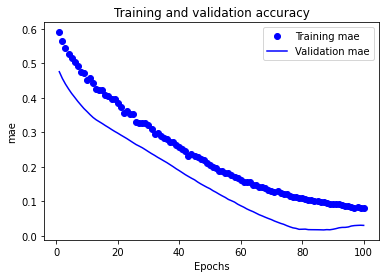

In [13]:
import matplotlib.pyplot as plt

mae = history.history['mae']
val_mae = history.history['val_mae']

epochs = range(1, len(mae) + 1)

plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()

plt.show()

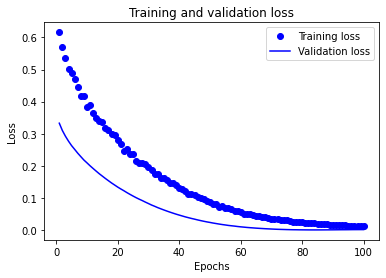

In [14]:
plt.clf()   # clear figure

loss = history.history['loss']
val_loss = history.history['val_loss']



plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## !! 
The dropout 0.2 seems to work better

In [45]:
def build_model() :
    model = models.Sequential()
    model.add (layers.Dense (6, activation = "sigmoid" , input_shape = x.shape))
    model.add (layers.Dropout(0.2))
    model.add (layers.Dense (12, activation = "relu"))
    model.add (layers.Dropout(0.2))
    model.add (layers.Dense (24, activation = "relu"))
    model.add (layers.Dropout(0.2))
    model.add (layers.Dense (24, activation = "relu"))
    model.add (layers.Dropout(0.2))
    model.add (layers.Dense (6, activation = "relu"))
    model.add (layers.Dropout(0.2))
    model.add (layers.Dense (6, activation = "relu"))
    model.add (layers.Dropout(0.2))
    model.add (layers.Dense (6, activation = "relu"))
    model.add (layers.Dropout(0.2))
    model.add (layers.Dense (6, activation = "relu"))
    model.add (layers.Dropout(0.2))
    model.add (layers.Dense (3))
    model.compile(optimizer = "adam" , loss = "mape" , metrics =["mae"])
    return model

In [46]:
model = build_model ()
history = model.fit ( x_train, y_train, epochs = 20, batch_size = 64, validation_data = (x_val, y_val) )
model.save("regr.h5")

Epoch 1/20
34/34 [==============================] - 1s 10ms/step - loss: 25180.2072 - mae: 0.0138 - val_loss: 276.5067 - val_mae: 3.7763e-04
Epoch 2/20
34/34 [==============================] - 0s 4ms/step - loss: 1823.9183 - mae: 0.0016 - val_loss: 415.5856 - val_mae: 4.8855e-04
Epoch 3/20
34/34 [==============================] - 0s 4ms/step - loss: 1455.3630 - mae: 0.0011 - val_loss: 237.4724 - val_mae: 3.8748e-04
Epoch 4/20
34/34 [==============================] - 0s 4ms/step - loss: 1177.5774 - mae: 7.0092e-04 - val_loss: 377.3624 - val_mae: 4.7888e-04
Epoch 5/20
34/34 [==============================] - 0s 6ms/step - loss: 748.5909 - mae: 6.4221e-04 - val_loss: 415.1202 - val_mae: 4.5335e-04
Epoch 6/20
34/34 [==============================] - 0s 6ms/step - loss: 868.4104 - mae: 5.6684e-04 - val_loss: 629.6037 - val_mae: 6.1829e-04
Epoch 7/20
34/34 [==============================] - 0s 5ms/step - loss: 1450.4754 - mae: 6.9816e-04 - val_loss: 635.6757 - val_mae: 6.3734e-04
Epoch 8/20


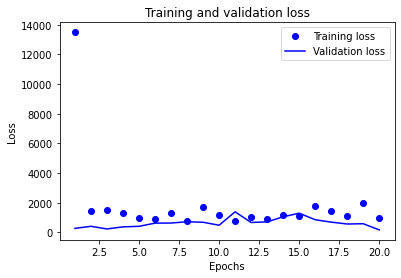

In [47]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

loss = history.history['loss']
val_loss = history.history['val_loss']



plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Test spectrum

In [153]:
from tensorflow import keras
model_regr = keras.models.load_model('regr.h5')
model_class = keras.models.load_model('class.h5')

In [154]:
def energy_spectrum(energy_array, bins):
    energy_array = np.array(energy_array)
    plt.hist(energy_array, bins, histtype=u'step')
    plt.yscale("log")
    plt.show()

In [155]:
final_p = []
final_e = []

for regr_pair in regr_data:
    final_e.append(np.linalg.norm(regr_pair[10:13]))
    final_p.append(np.linalg.norm(regr_pair[13:16]))

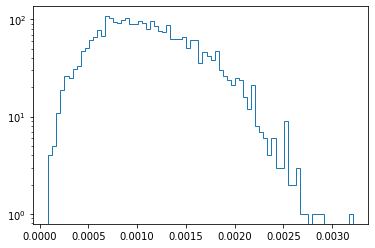

In [156]:
energy_spectrum(final_e, 75)

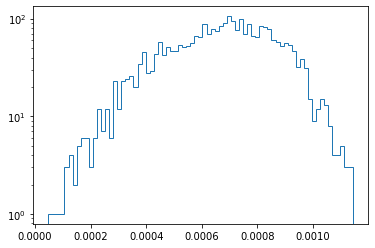

In [157]:
energy_spectrum(final_p, 75)

In [158]:
x.shape

(2892, 6)

In [161]:
x[0]

array([-8.74550373e-04,  2.66467541e-04, -5.28179808e-04,  4.34358051e-04,
       -5.48721800e-05,  1.95071087e-04])

In [162]:
from tensorflow import keras 
photon_final_nn = []
threshold = 0.5
for i, x_ in enumerate(xc[:3000]):
    if i%10 == 0:
        print("{}%".format(i/len(xc) * 100))
    x_ = np.array([x_])
    classification = model_class.predict(np.stack(x_))
    if classification >= threshold:
        regr_x = np.array([x_[0,:6]])
        regr_result = model_regr.predict(regr_x)
        photon_final_nn.append(np.linalg.norm(regr_result[0]))

0.0%
0.008060355945318546%
0.01612071189063709%
0.02418106783595564%
0.03224142378127418%
0.040301779726592726%
0.04836213567191128%
0.05642249161722982%
0.06448284756254836%
0.0725432035078669%
0.08060355945318545%
0.08866391539850399%
0.09672427134382255%
0.10478462728914109%
0.11284498323445964%
0.12090533917977818%
0.12896569512509673%
0.13702605107041527%
0.1450864070157338%
0.15314676296105237%
0.1612071189063709%
0.16926747485168944%
0.17732783079700798%
0.18538818674232654%
0.1934485426876451%
0.20150889863296365%
0.20956925457828218%
0.21762961052360072%
0.22568996646891928%
0.23375032241423782%
0.24181067835955636%
0.2498710343048749%
0.25793139025019346%
0.26599174619551197%
0.27405210214083053%
0.2821124580861491%
0.2901728140314676%
0.29823316997678617%
0.30629352592210474%
0.31435388186742325%
0.3224142378127418%
0.3304745937580603%
0.3385349497033789%
0.34659530564869745%
0.35465566159401596%
0.3627160175393345%
0.3707763734846531%
0.37883672942997165%
0.3868970853752902

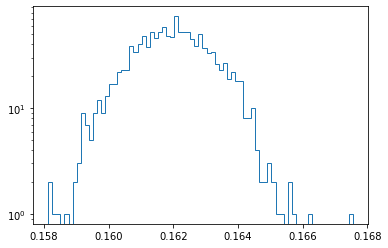

In [163]:
energy_spectrum(photon_final_nn, 75)

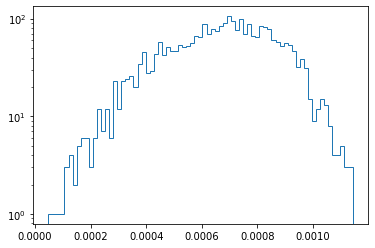

In [167]:
energy_spectrum(final_p, 75)

In [15]:
# fixed bin size
#bins = np.arange(0., 100, 100) 

plt.hist(photon_final_nn, 1000, alpha=0.5, label='NN prediction')
plt.hist(final_p, 1000, alpha=0.5, label='Photon Momentum from simulations')
plt.xlabel('Photon Momentum')
plt.ylabel('count')
plt.legend(loc='upper right')
plt.xlim((0, 0.25))
plt.ylim((0, 1000))
plt.show()

NameError: name 'plt' is not defined

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         2.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,
         3.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
         0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,
         1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  3.,  2.,  0.,  0.,  1.,
         0.,  1.,  1.,  4.,  0.,  0.,  1.,  2.,  0.

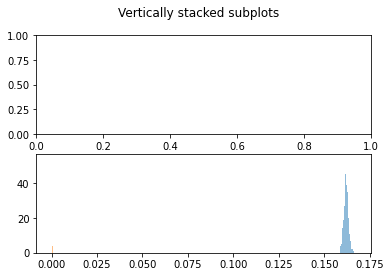

In [166]:
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
plt.hist(photon_final_nn, 100, alpha=0.5, label='NN prediction')
plt.hist(final_p, 1000, alpha=0.5, label='Photon Momentum from simulations')